In [86]:
 import tensorflow as tf
 import pandas as pd
 import numpy as np
 import matplotlib.pyplot as plt
 import sklearn
 import pandas_datareader as web
 import datetime as dt
 from sklearn.preprocessing import MinMaxScaler
 from tensorflow.keras.layers import LSTM, Dense
 from tensorflow.keras.models import Sequential
 from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
 from tensorflow.keras.models import load_model
 
 import math


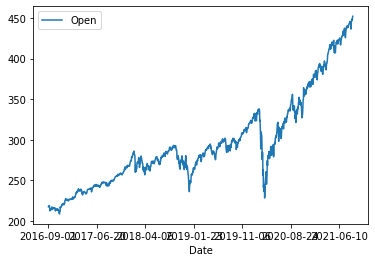

In [87]:
df=pd.read_csv('SPY.csv')
df.plot(x='Date',y='Open')



In [88]:

full_data=pd.DataFrame(data=df['Open'])
scaler=MinMaxScaler()
scaled_full_data=scaler.fit_transform(full_data)





In [89]:

for i in range (0,len(scaled_full_data)):
  for j in scaled_full_data[i]:
    if math.isnan(j):
      scaled_full_data[i]=scaled_full_data[i-1]





In [90]:
length=7
batch_size=1
n_features=1

In [91]:

generator=TimeseriesGenerator(scaled_full_data,scaled_full_data,length=length,batch_size=batch_size)

In [92]:

model=Sequential()
model.add(LSTM(length,input_shape=(length,n_features)))
model.add(Dense(1))


model=load_model('SPY_pred.h5')

In [93]:

model.compile(optimizer='adam',loss='mse')
model.fit(generator,epochs=10)


Epoch 1/10
1251/1251 [==============================] - 7s 4ms/step - loss: 2.2754e-04
Epoch 2/10
1251/1251 [==============================] - 5s 4ms/step - loss: 2.2002e-04
Epoch 3/10
1251/1251 [==============================] - 5s 4ms/step - loss: 2.2409e-04
Epoch 4/10
1251/1251 [==============================] - 5s 4ms/step - loss: 2.1657e-04
Epoch 5/10
1251/1251 [==============================] - 5s 4ms/step - loss: 2.1367e-04
Epoch 6/10
1251/1251 [==============================] - 5s 4ms/step - loss: 2.0847e-04
Epoch 7/10
1251/1251 [==============================] - 5s 4ms/step - loss: 2.1229e-04
Epoch 8/10
1251/1251 [==============================] - 5s 4ms/step - loss: 2.1097e-04
Epoch 9/10
1251/1251 [==============================] - 5s 4ms/step - loss: 2.0647e-04
Epoch 10/10
1251/1251 [==============================] - 5s 4ms/step - loss: 2.1385e-04


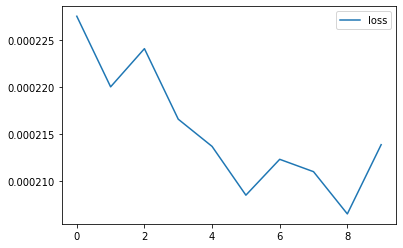

In [94]:

model.save('SPY_pred.h5')
loss=pd.DataFrame(model.history.history)
loss.plot()


In [95]:
forecast=[]



#first_eval_batch=scaled_full_data[-length:]
first_eval_batch=scaled_full_data[0:length]
print(first_eval_batch)


current_batch=first_eval_batch.reshape((1,length,n_features))

for i in range(len(full_data)-length):
  first_eval_batch=scaled_full_data[0+i:length+i]
  current_batch=first_eval_batch.reshape((1,length,n_features))
  current_pred = model.predict(current_batch)[0]
  forecast.append(current_pred)
  #current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)
  

forecast=scaler.inverse_transform(forecast)
full_data=full_data[length:]
full_data['Forecast']=forecast


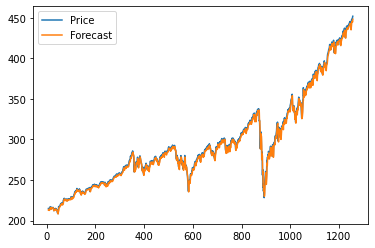

In [96]:



full_data.columns=['Price','Forecast']

full_data.plot()
